In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn import metrics

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
     
    

In [39]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [40]:

print('This data set has {} rows and {} columns.\n'.format(df.shape[0],df.shape[1]))
df.info()

This data set has 8950 rows and 18 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX        

In [41]:

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [42]:
# Lets check the missing values and fill them with appropriate method.
def null_values(df):
    nv=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1


In [43]:
# We can fill the null values with mean.
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df.MINIMUM_PAYMENTS.mean())
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df.CREDIT_LIMIT.mean())
null_values(df).sum()

Missing_Records    0.0
dtype: float64

In [44]:

# Actually we can drop the "CUST_ID" columns because we will not use it.
df=df.drop('CUST_ID',axis=1)

In [45]:
# There are lots of outliers in columns but we will not apply winsorize or another methods to them.Because we may have information loss.
# They may represent another clusters.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()
     

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [46]:
# StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale.
scaler=StandardScaler()
df_scl=scaler.fit_transform(df)

In [47]:

# Normalization refers to rescaling real valued numeric attributes into the range 0 and 1.
# It is useful to scale the input attributes for a model that relies on the magnitude of values, such as distance measures used in unsupervised learning.
norm=normalize(df_scl) 

In [48]:

# We can apply both (StandartScaler and Normalize) on our data before clustering. 
df_norm=pd.DataFrame(norm)

K MEANS CLUSTERING

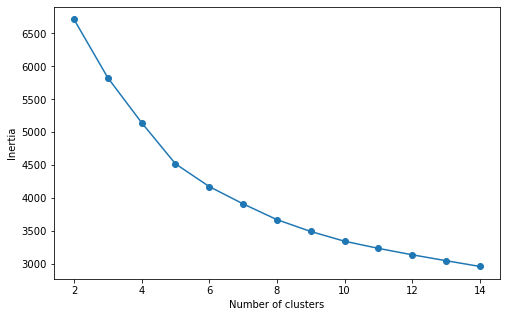

In [49]:

scores = []
for k in range(2,15):
    km = KMeans(n_clusters=k,random_state=123)
    km = km.fit(df_norm)
    scores.append(km.inertia_)
dfk = pd.DataFrame({'Cluster':range(2,15), 'Score':scores})
plt.figure(figsize=(8,5))
plt.plot(dfk['Cluster'], dfk['Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [50]:
for i in range(5,11):
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print("Silhouette score for {} clusters k-means : {} ".format(i,metrics.silhouette_score(df_norm,kmeans_labels, metric='euclidean').round(3)))

Silhouette score for 5 clusters k-means : 0.229 
Silhouette score for 6 clusters k-means : 0.245 
Silhouette score for 7 clusters k-means : 0.238 
Silhouette score for 8 clusters k-means : 0.239 
Silhouette score for 9 clusters k-means : 0.218 
Silhouette score for 10 clusters k-means : 0.217 


In [51]:
for i in [6,7,8]:
    kmeans_labels=KMeans(n_clusters=i,random_state=123).fit_predict(df_norm)
    print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,kmeans_labels).round(3)))
     

Davies Bouldin Score:1.404
Davies Bouldin Score:1.354
Davies Bouldin Score:1.412


In [52]:
kmeans_labels=KMeans(n_clusters=7,random_state=123).fit_predict(df_norm)

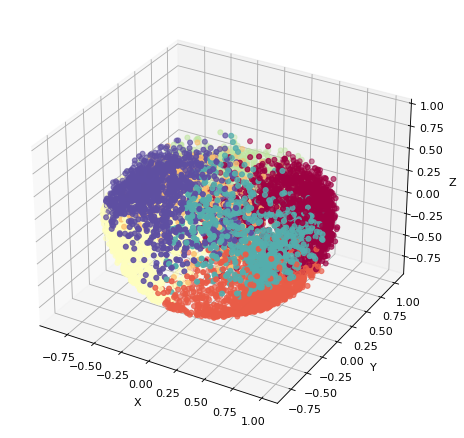

In [53]:
pca = PCA(n_components=3).fit_transform(df_norm)
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=kmeans_labels,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

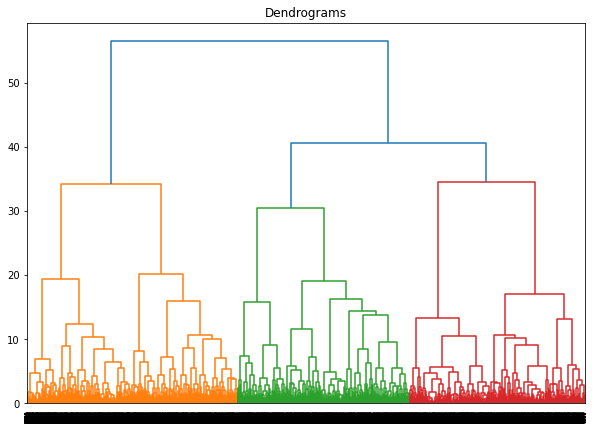

In [54]:

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_norm, method='ward'))

In [55]:
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcp=hcluster.fit_predict(df_norm)
print('Silhouette Score for Hieararchial Clustering:'+str(metrics.silhouette_score(df_norm,hcp,metric='euclidean')))
print('Davies Bouldin Score:'+str(metrics.davies_bouldin_score(df_norm,hcp)))
     

Silhouette Score for Hieararchial Clustering:0.16269232126810304
Davies Bouldin Score:2.0178566980982713


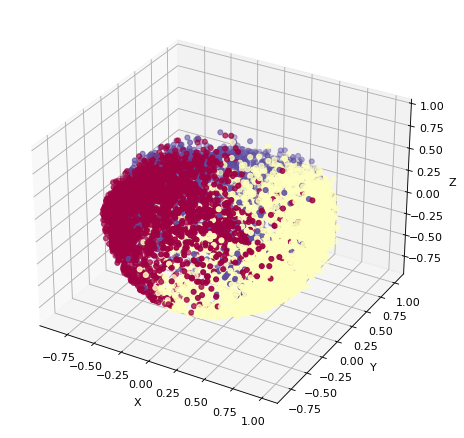

In [56]:
fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=hcp,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

In [57]:
results=pd.DataFrame(columns=['Eps','Min_Samples','Number of Cluster','Silhouette Score'])
for i in range(1,12):
  for j in range(1,12):
      dbscan_cluster = DBSCAN(eps=i*0.2, min_samples=j)
      clusters=dbscan_cluster.fit_predict(df_norm)
      if len(np.unique(clusters))>2:
          results=results.append({'Eps':i*0.2,
                        'Min_Samples':j,
                        'Number of Cluster':len(np.unique(clusters)),
                        'Silhouette Score':metrics.silhouette_score(df_norm,clusters),
                        'Davies Bouldin Score':metrics.davies_bouldin_score(df_norm,clusters)}, ignore_index=True)
     

In [58]:
results.sort_values('Silhouette Score',ascending=False)[:5]

,Eps,Min_Samples,Number of Cluster,Silhouette Score,Davies Bouldin Score
16,0.4,6.0,3.0,-0.03353,4.460939
18,0.6,2.0,4.0,-0.04625,3.857114
14,0.4,4.0,5.0,-0.12267,3.361897
15,0.4,5.0,5.0,-0.124499,3.304983
10,0.2,11.0,18.0,-0.238821,1.344078


It seems that DBSCAN is not an appropriate method for this dataset. We have selected eps and min_samples that are 0.4 and 4 respectively.

In [59]:
dbscan_cluster = DBSCAN(eps=0.4, min_samples=4)
db_clusters=dbscan_cluster.fit_predict(df_norm)
     

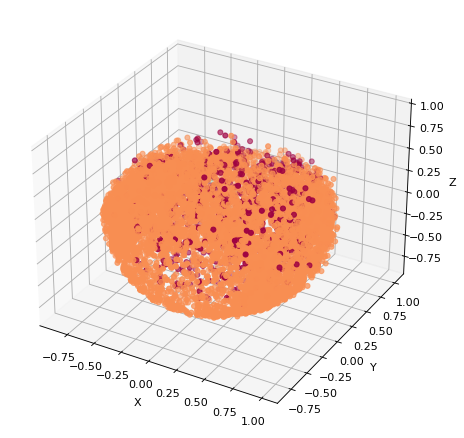

In [60]:

fig = plt.figure(figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")
ax.scatter3D(pca.T[0],pca.T[1],pca.T[2],c=db_clusters,cmap='Spectral')

xLabel = ax.set_xlabel('X')
yLabel = ax.set_ylabel('Y')
zLabel = ax.set_zlabel('Z')

It seems like, there isn't distinguishable distributions in data for clustering.

Comparison of Results

In [61]:
algorithms=["K-Means","Hierarchical Clustering","DBSCAN"]

# Silhouette Score
ss=[metrics.silhouette_score(df_norm,kmeans_labels),metrics.silhouette_score(df_norm,hcp),
   metrics.silhouette_score(df_norm,db_clusters)]

# Davies Bouldin Score
db=[metrics.davies_bouldin_score(df_norm,kmeans_labels),metrics.davies_bouldin_score(df_norm,hcp),
   metrics.davies_bouldin_score(df_norm,db_clusters)]
     

In [62]:
comprsn={"Algorithms":algorithms,"Davies Bouldin":db,"Silhouette Score":ss}
compdf=pd.DataFrame(comprsn)
display(compdf.sort_values(by=["Silhouette Score"], ascending=False))
     

,Algorithms,Davies Bouldin,Silhouette Score
0,K-Means,1.354323,0.237578
1,Hierarchical Clustering,2.017857,0.162692
2,DBSCAN,3.361897,-0.122670


In [63]:
df['Clusters']=list(kmeans_labels)
customers=pd.DataFrame(df['Clusters'].value_counts()).rename(columns={'Clusters':'Number of Customers'})
customers.T

,3,0,4,1,6,5,2
Number of Customers,1865,1653,1551,1305,1150,772,654


In [64]:
means=pd.DataFrame(df.describe().loc['mean'])
means.T.iloc[:,[0,1,6,8,9,11,12,16]].round(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
mean,1564.5,0.9,0.5,0.4,0.1,14.7,4494.4,11.5


In [65]:
df.set_index('Clusters')
grouped=df.groupby(by='Clusters').mean().round(1)
grouped.iloc[:,[0,1,6,8,9,11,12,16]]
     

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,TENURE
Clusters,,,,,,,,
0,2020.6,1.0,0.9,0.6,0.1,44.6,7003.0,11.9
1,947.8,1.0,0.9,0.8,0.0,18.5,2906.4,11.9
2,871.9,0.8,0.4,0.3,0.2,5.1,2511.5,7.4
3,1259.5,1.0,0.1,0.0,0.1,2.2,2780.3,11.9
4,4047.4,1.0,0.2,0.2,0.4,5.8,6750.6,11.7
5,99.6,0.9,0.8,0.7,0.0,16.6,4119.6,11.7
6,131.8,0.4,0.2,0.2,0.0,4.1,3807.1,11.8


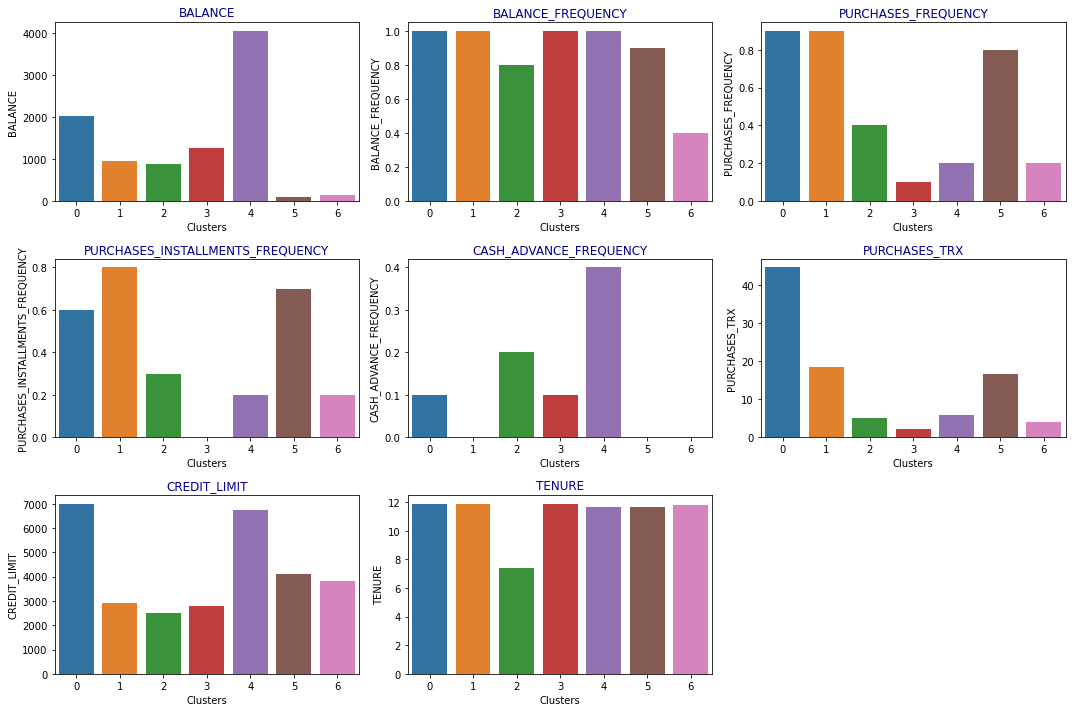

In [66]:
features=["BALANCE","BALANCE_FREQUENCY","PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","TENURE"]
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()